<a href="https://colab.research.google.com/github/beforeIkillYou/google-colab/blob/main/hypoTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hypothesis:** The effect of spending during the festival months is based on psychological parameters, socio-economic parameters and physiological parameters.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
import random
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns


# Read data from Excel
df = pd.read_excel("/content/customers.xlsx")


Actual brainstorming begins here

                                                  OLS Regression Results                                                 
Dep. Variable:     How much do you spend on shopping during the festival months?   R-squared:                       0.243
Model:                                                                       OLS   Adj. R-squared:                  0.236
Method:                                                            Least Squares   F-statistic:                     33.76
Date:                                                           Sun, 27 Aug 2023   Prob (F-statistic):           6.75e-08
Time:                                                                   09:03:10   Log-Likelihood:                -215.41
No. Observations:                                                            107   AIC:                             434.8
Df Residuals:                                                                105   BIC:                             440.2
Df Model:               

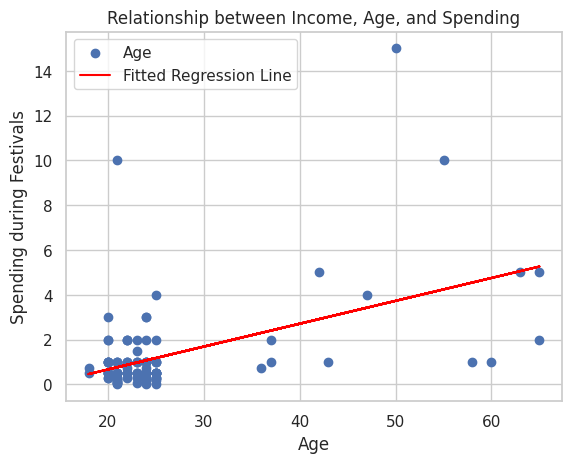

1 unit of income and spending = 1 million rupiah


In [ ]:
#hypo1: younger people tend to spend more during festivals


age = 'How old are you?'
spending = 'How much do you spend on shopping during the festival months?'

#converting agetmp
tmp = []
for val in df[age]:
  if val == 'Less than 20 years':
    tmp.append(random.randint(18,20))
  elif val == 'From 20 - 25 years':
    tmp.append(random.randint(20,25))
  elif tmp == 'Daru 26 - 30 years old':
    tmp.append(random.randint(26,30))
  else :
    tmp.append(random.randint(30 , 65))
df['age'] = tmp

# Perform multiple linear regression
X = df[['age']]  # Independent variables
X = sm.add_constant(X)      # Add a constant term for intercept
y = df[spending]          # Dependent variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())      # Print model summary

# Scatter plots with fitted regression lines
plt.scatter(df['age'], df[spending], label="Age")
plt.plot(df['age'], model.predict(X), color='red', label="Fitted Regression Line")
plt.xlabel("Age")
plt.ylabel("Spending during Festivals")
plt.legend()
plt.title("Relationship between Income, Age, and Spending")
plt.show()
print('1 unit of income and spending = 1 million rupiah')

ANOVA F-Statistic: 19.918263344856168
p-value: 2.937725439405589e-10


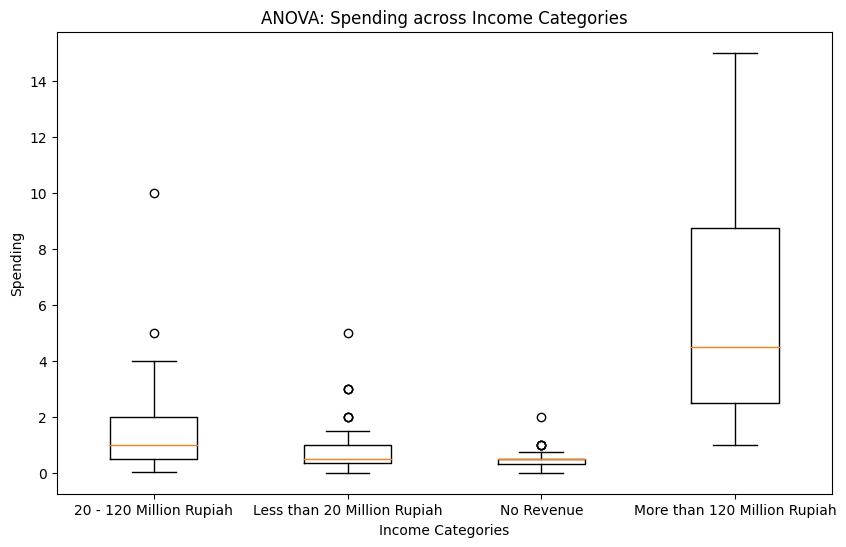

In [ ]:
#hypo2: rich people tend to spend more during festival

income = 'Annual Revenue'

# Perform ANOVA
income_categories = df[income].unique()
anova_results = []

for category in income_categories:
    group_data = df[df[income] == category][spending]
    anova_results.append(group_data)

f_statistic, p_value = f_oneway(*anova_results)

# Print ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("p-value:", p_value)

# Visualize box plots for each income category
plt.figure(figsize=(10, 6))
plt.boxplot(anova_results, labels=income_categories)
plt.xlabel("Income Categories")
plt.ylabel("Spending")
plt.title("ANOVA: Spending across Income Categories")
plt.show()


T-Statistic: 1.8005963782102694
p-value: 0.07969197906303817


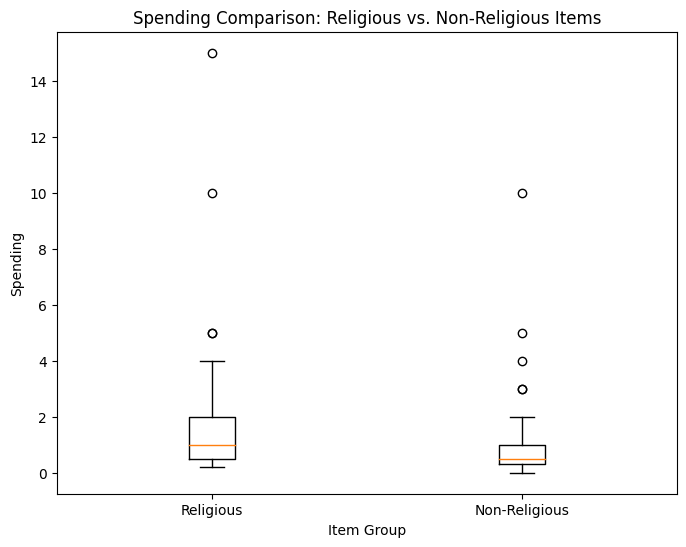

In [ ]:
#hypo3: spending is more on religious items during the festive season

items = 'What items do you often buy during the festival season?'


# Separate consumers with "religious" in their items and those without
religious_items = df[df[items].str.contains("religious", case=False)]
non_religious_items = df[~df[items].str.contains("religious", case=False)]

# Perform t-test
t_statistic, p_value = ttest_ind(religious_items[spending], non_religious_items[spending], equal_var=False)

# Print t-test results
print("T-Statistic:", t_statistic)
print("p-value:", p_value)

# Visualize spending distribution for both groups
plt.figure(figsize=(8, 6))
plt.boxplot([religious_items[spending], non_religious_items[spending]], labels=['Religious', 'Non-Religious'])
plt.xlabel("Item Group")
plt.ylabel("Spending")
plt.title("Spending Comparison: Religious vs. Non-Religious Items")
plt.show()


T-Statistic: 2.6926968642698035
p-value: 0.010315552806249587


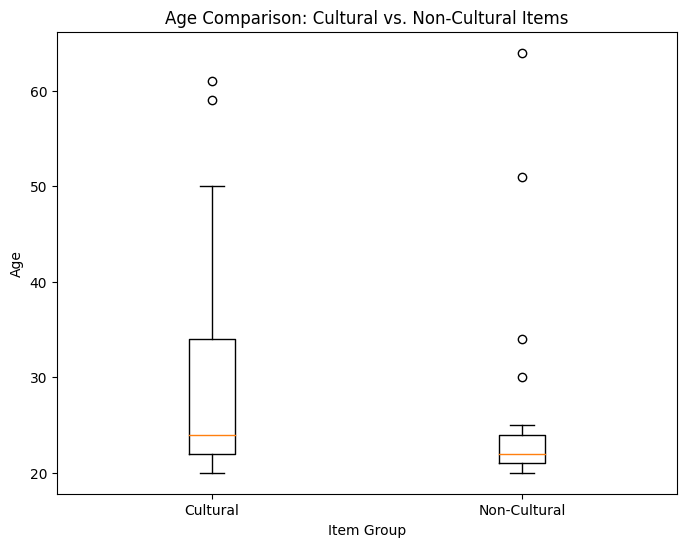

In [ ]:
#hypo4: fewer younger people show interest in buying for religious activites hence showing lower cultural identity

reason = 'The main reason to buy during the festival season (Holidays)'

cultural_activity = df[df[items].str.contains("Religious", case=False)]
non_cultural_activity = df[~df[items].str.contains("Religious", case=False)]

# Perform t-test
t_statistic, p_value = ttest_ind(religious_items[age], non_religious_items[age], equal_var=False)

# Print t-test results
print("T-Statistic:", t_statistic)
print("p-value:", p_value)

# Visualize spending distribution for both groups
plt.figure(figsize=(8, 6))
plt.boxplot([religious_items[age], non_religious_items[age]], labels=['Cultural', 'Non-Cultural'])
plt.xlabel("Purchase Activity Group")
plt.ylabel("Age")
plt.title("Age Comparison: Cultural vs. Non-Cultural Purchases")
plt.show()

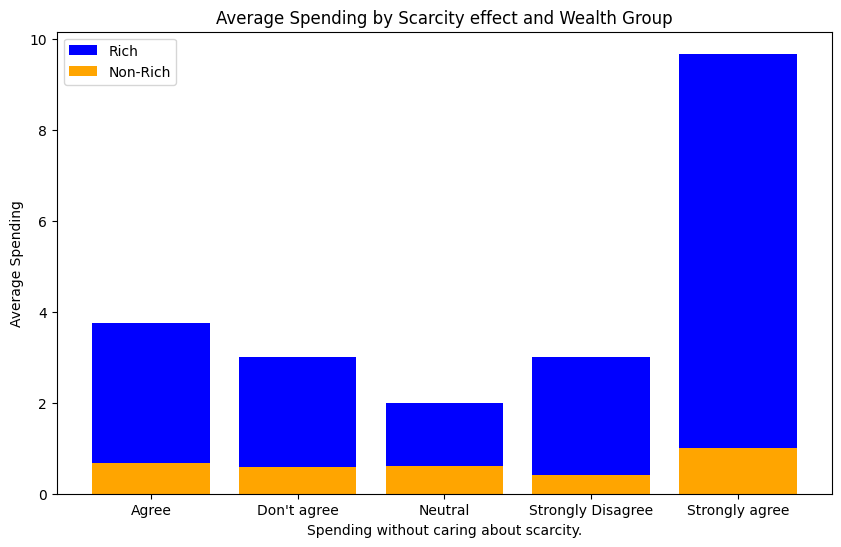

In [ ]:
#hypo5: rich people(spending more than avg->1.3million rupiah) tend to care less about the scarcity of market resources.

spendthrift = 'I can make purchases at any time, so I tend to buy more.'

# Define rich individuals based on spending threshold
df['rich'] = np.where(df[spending] > 1.3, 'Rich', 'Non-Rich')

# Calculate average spending for each spendthrift response and wealth group
avg_spending = df.groupby([spendthrift, 'rich'])[spending].mean().reset_index()

# Visualize average spending using a bar plot
plt.figure(figsize=(10, 6))
colors = {'Rich': 'blue', 'Non-Rich': 'orange'}
for rich_status, color in colors.items():
    subset = avg_spending[avg_spending['rich'] == rich_status]
    plt.bar(subset[spendthrift], subset[spending], color=color, label=rich_status)

plt.xlabel("Spending without caring about scarcity.")
plt.ylabel("Average Spending")
plt.title("Average Spending by Scarcity effect and Wealth Group")
plt.legend()
plt.show()

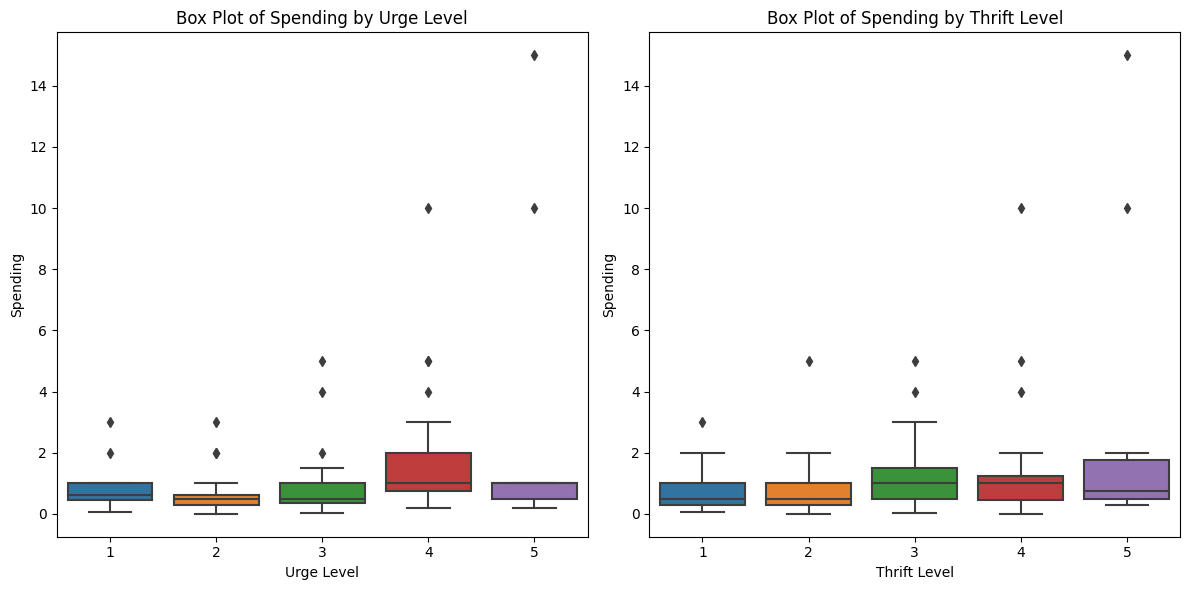

In [ ]:
#hypo6 : people tend to buy more or have a hard time controlling their urge to spend when they see a 'good' deal

urge = 'I have a hard time controlling my urge to buy when I see a good deal.'
thrift = 'When I see a good deal, I tend to buy more than I planned.'

# Create box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=urge, y=spending, data=df)
plt.xlabel('Urge Level')
plt.ylabel('Spending')
plt.title('Box Plot of Spending by Urge Level')

plt.subplot(1, 2, 2)
sns.boxplot(x=thrift, y=spending, data=df)
plt.xlabel('Thrift Level')
plt.ylabel('Spending')
plt.title('Box Plot of Spending by Thrift Level')

plt.tight_layout()
plt.show()


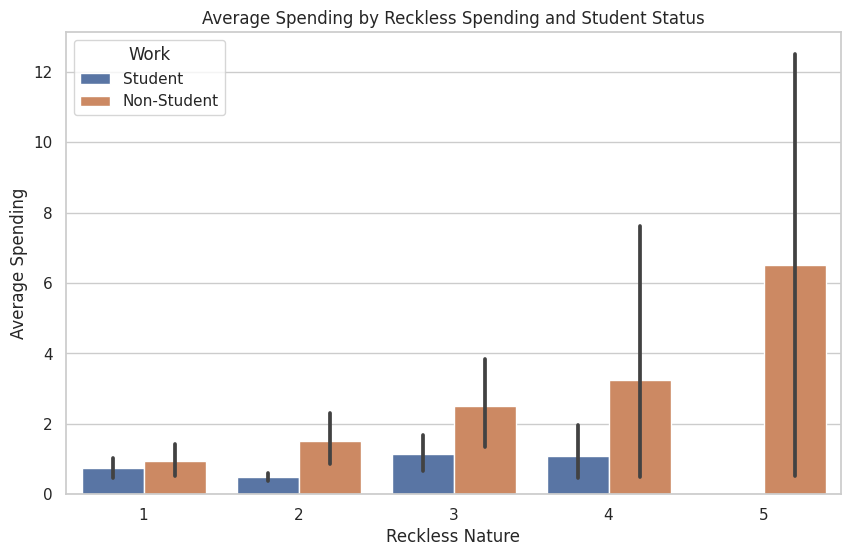

In [ ]:
#hypo7: students do lesser reckless festive shopping then other social classes.

work = 'Work'
reckless = 'I often buy things without thinking.'

# Create a boolean column to classify students
df['student'] = np.where( df[work].str.contains('Student'), 'Student' , 'Non-Student')

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(x=reckless, y=spending, hue='student', data=df)

plt.xlabel("Reckless Nature")
plt.ylabel("Average Spending")
plt.title("Average Spending by Reckless Spending and Student Status")
plt.legend(title="Work")
plt.show()

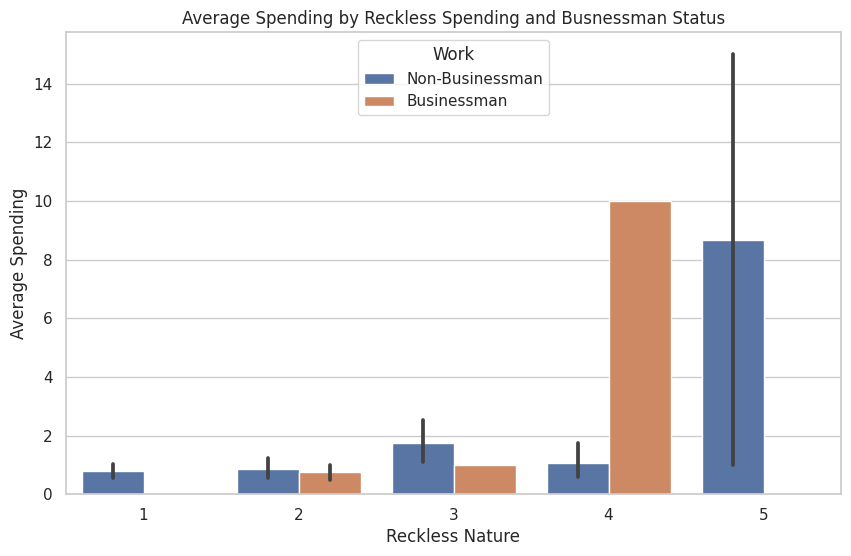

In [ ]:
#hypo8: businessman do more reckless fetsive shopping then other social classes.

work = 'Work'
reckless = 'I often buy things without thinking.'

# Create a boolean column to classify
df['businessman'] = np.where( df[work].str.contains('Businessman'), 'Businessman' , 'Non-Businessman')

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(x=reckless, y=spending, hue='businessman', data=df)

plt.xlabel("Reckless Nature")
plt.ylabel("Average Spending")
plt.title("Average Spending by Reckless Spending and Busnessman Status")
plt.legend(title="Work")
plt.show()

Kruskal-Wallis Test Result:
Test Statistic: 4.77415572603405
P-Value: 0.1891014799975206


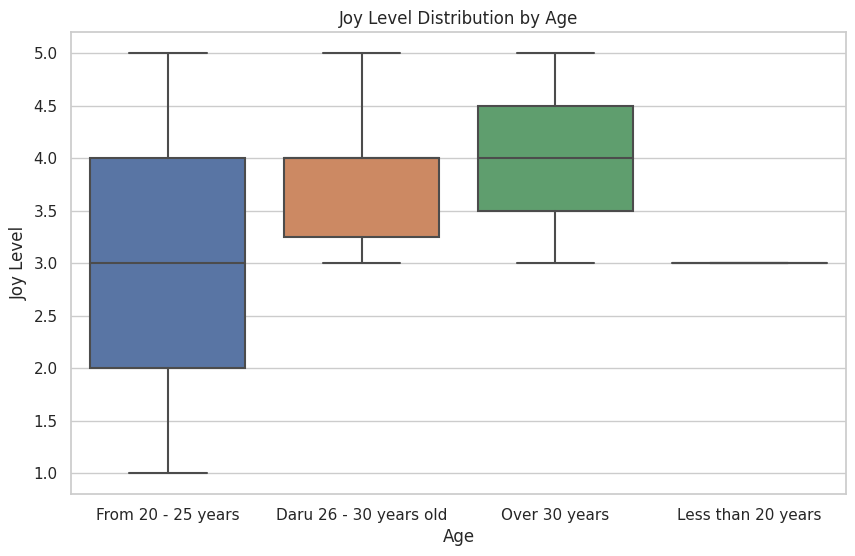

In [ ]:
#hypo9: people between the age of 20 to 25 find most joy in shopping a lot

joy = 'I feel joy when I shop a lot.'

result = stats.kruskal(*[df[df[age] == group][joy] for group in df[age].unique()])

print("Kruskal-Wallis Test Result:")
print("Test Statistic:", result.statistic)
print("P-Value:", result.pvalue)

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=age, y=joy, data=df)
plt.xlabel("Age")
plt.ylabel("Joy Level")
plt.title("Joy Level Distribution by Age")
plt.show()

Kruskal-Wallis Test Result:
Test Statistic: 8.446130811629525
P-Value: 0.03763755068486331


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


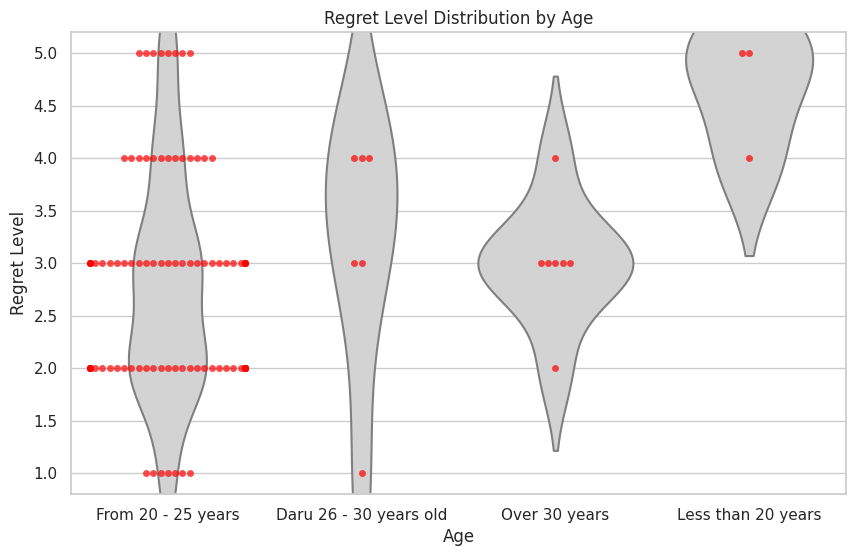

In [ ]:
#hypo10: people over 30 years find the most regret in shopping a lot

regret = 'After I bought a lot of things, I feel regretful.'


# Perform Kruskal-Wallis test
result = stats.kruskal(*[df[df[age] == group][regret] for group in df[age].unique()])

print("Kruskal-Wallis Test Result:")
print("Test Statistic:", result.statistic)
print("P-Value:", result.pvalue)

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a combined violin and swarm plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=age, y=regret, data=df, inner=None, color='lightgray')
sns.swarmplot(x=age, y=regret, data=df, color='red', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Regret Level")
plt.title("Regret Level Distribution by Age")
plt.show()

T-Test Result:
T-Statistic: 1.2912285112477297
P-Value: 0.19945991036966293


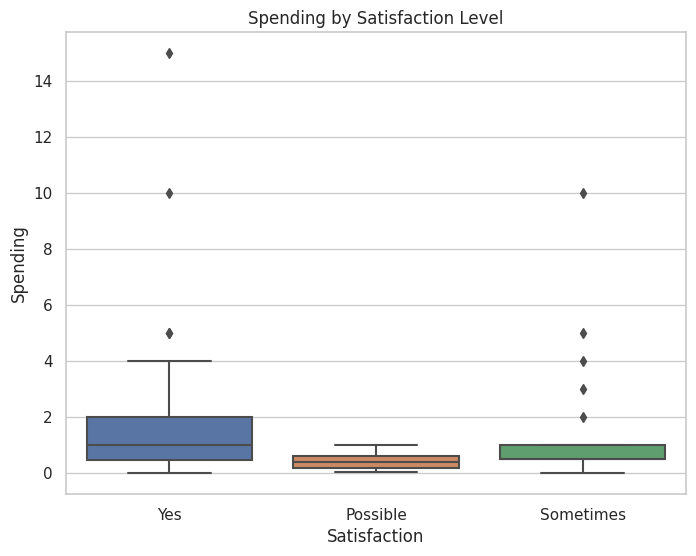

In [ ]:
#hypo11: customer satisfaction is directly dpended on their festive spending.

satisfaction = 'Are you satisfied after buying during the festival season (Holidays)?'

# Filter data for satisfied and not satisfied customers
satisfied_spending = df[df[satisfaction] == 'Yes'][spending]
not_satisfied_spending = df[df[satisfaction] != 'Yes'][spending]

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(satisfied_spending, not_satisfied_spending)

print("T-Test Result:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a box plot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=satisfaction, y=spending, data=df)
plt.xlabel("Satisfaction")
plt.ylabel("Spending")
plt.title("Spending by Satisfaction Level")
plt.show()


In [ ]:
# Hypo 12 performing Apriori algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Creating a sample dataset
data = {
    'age': ['below 20', 'between 20-25', 'between 25-30', 'above 30', 'above 30'],
    'agreeness': ['agree', 'strongly agree', 'strongly disagree', 'neutral', 'dont agree'],
    'spending_during_festival': [True, True, True, True, False]
}

df = pd.DataFrame(data)

# Convert categorical variables to one-hot encoded columns
df_encoded = pd.get_dummies(df, columns=['age', 'agreeness'])

# Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules)


                                          antecedents  \
0                                      (age_below 20)   
1                          (spending_during_festival)   
2                                 (age_between 20-25)   
3                          (spending_during_festival)   
4                                 (age_between 25-30)   
5                          (spending_during_festival)   
6                                   (agreeness_agree)   
7                          (spending_during_festival)   
8                                 (agreeness_neutral)   
9                          (spending_during_festival)   
10                         (agreeness_strongly agree)   
11                         (spending_during_festival)   
12                      (agreeness_strongly disagree)   
13                         (spending_during_festival)   
14                                     (age_above 30)   
15                             (agreeness_dont agree)   
16                             

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


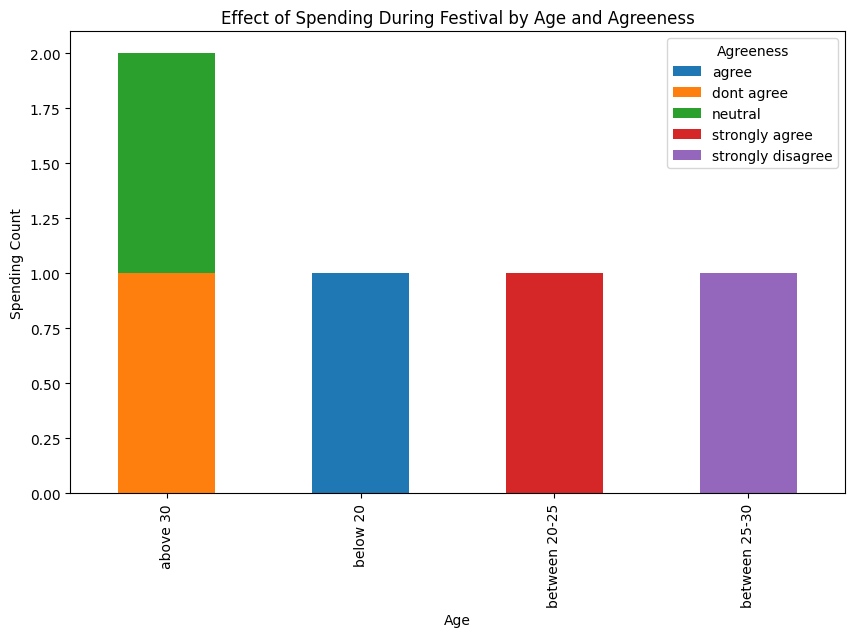

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'age': ['below 20', 'between 20-25', 'between 25-30', 'above 30', 'above 30'],
    'agreeness': ['agree', 'strongly agree', 'strongly disagree', 'neutral', 'dont agree'],
    'spending_during_festival': [True, True, True, True, True]
}

df = pd.DataFrame(data)

# Group by age and agreeness to count spending during festival
grouped = df.groupby(['age', 'agreeness'])['spending_during_festival'].sum().unstack()

# Create the column chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Effect of Spending During Festival by Age and Agreeness')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Count')

# Show the legend
plt.legend(title='Agreeness')

# Show the plot
plt.show()


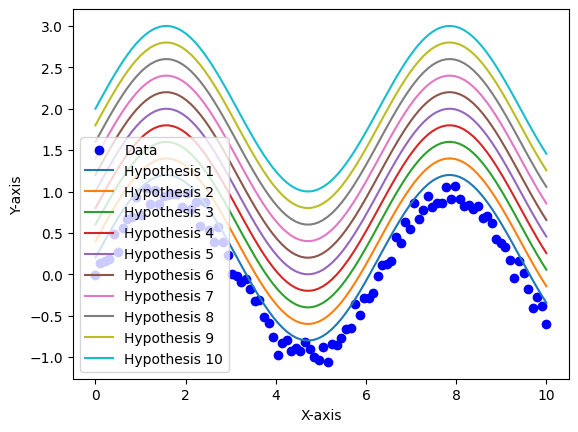

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data points
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)  # Simulated  data

# Create a scatter plot of the data
plt.scatter(x, y, label='Data', color='blue', marker='o')

# Generate and plot 10 hypotheses as lines
for i in range(1, 11):
    hypothesis = np.sin(x) + i * 0.2
    label = f'Hypothesis {i}'
    plt.plot(x, hypothesis, label=label)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()
